In [97]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.metrics import F1Score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [98]:
df_features = pd.read_csv(filepath_or_buffer='training_data/landmarks.csv',
                 index_col='pose_id')

df_features.head()

,x_nose,y_nose,z_nose,x_left_eye_inner,y_left_eye_inner,z_left_eye_inner,x_left_eye,y_left_eye,z_left_eye,x_left_eye_outer,...,z_left_heel,x_right_heel,y_right_heel,z_right_heel,x_left_foot_index,y_left_foot_index,z_left_foot_index,x_right_foot_index,y_right_foot_index,z_right_foot_index
pose_id,,,,,,,,,,,,,,,,,,,,,
0,-5.889507,-57.637520,-45.019750,-4.656085,-62.832863,-44.571823,-3.302626,-63.386856,-44.567863,-2.032406,...,56.852562,-0.842025,35.037060,50.565020,5.842190,45.971020,50.263714,0.092779,45.842150,41.427795
1,-4.255504,-62.935925,-128.907500,-2.977403,-67.035990,-124.258545,-2.215265,-67.198250,-124.263240,-1.494903,...,-14.129170,-1.298891,54.733307,-6.886051,3.980098,65.370830,-49.023930,-5.090634,65.641780,-42.878056
2,-2.878917,-61.709988,-137.453340,-1.619050,-65.693750,-132.181660,-0.785822,-65.814340,-132.184070,-0.019743,...,-19.904400,-2.119770,51.265694,-15.554097,1.994894,62.725025,-57.717957,-4.452602,62.494457,-53.804527
3,-4.242575,-60.371220,-135.094830,-3.118133,-64.416000,-129.995930,-2.369744,-64.603290,-130.003400,-1.753780,...,-6.855729,-1.485475,59.729427,1.433403,1.950102,68.187256,-42.989098,-4.573338,68.144350,-34.117043
4,-0.805543,-56.178570,-41.124413,-0.055174,-58.501305,-37.938560,0.456936,-58.473960,-37.954430,0.969290,...,47.124107,-2.455719,52.861732,45.936783,2.699764,57.254112,27.531416,-2.288348,57.803005,26.288315


In [99]:
df_labels = pd.read_csv(filepath_or_buffer='training_data/labels.csv',
                        index_col='pose_id')
df_labels.head()

,pose
pose_id,
0,jumping_jacks_down
1,jumping_jacks_down
2,jumping_jacks_down
3,jumping_jacks_down
4,jumping_jacks_down


In [100]:
X = df_features.values
y = pd.get_dummies(df_labels, dtype=int).values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=38, stratify=y)

In [102]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [103]:
type(X_train)

numpy.ndarray

In [104]:
def get_model(filters=8, dropout1=0.2, dropout2=0.2, classes=10):
    model = Sequential([
        Input(shape=(99,)),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        BatchNormalization(),
        Dropout(dropout1),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        Dense(filters, activation='relu'),
        BatchNormalization(),
        Dropout(dropout2),
        Dense(classes, activation='softmax'),
    ])
    model.summary()

    return model

In [105]:
def stop_early(patience=10, start=50):
    earlystopping=EarlyStopping(monitor='val_f1_score',
                                patience=patience,
                                verbose=1,
                                mode='max',
                                restore_best_weights=True,
                                start_from_epoch=start)
    return earlystopping

In [106]:
model1 = get_model(64, 0.5, 0.5, 10)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 64)             │         6,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,682 (143.29 KB)

 Trainable params: 36,426 (142.29 KB)

 Non-trainable params: 256 (1.00 KB)

In [107]:
model1.compile(optimizer='adam', metrics=[F1Score(average='macro', name='f1_score')], loss='categorical_focal_crossentropy')
model1.fit(X_train, y_train, epochs=100, validation_split=0.1, callbacks=[stop_early(20)])

Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - f1_score: 0.1174 - loss: 0.6771 - val_f1_score: 0.1762 - val_loss: 0.4488
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.2484 - loss: 0.4571 - val_f1_score: 0.2369 - val_loss: 0.4283
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.3262 - loss: 0.3545 - val_f1_score: 0.2668 - val_loss: 0.3910
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.3401 - loss: 0.3355 - val_f1_score: 0.3159 - val_loss: 0.3475
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.4189 - loss: 0.2800 - val_f1_score: 0.4070 - val_loss: 0.3198
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.4661 - loss: 0.2472 - val_f1_score: 0.4801 - val_loss: 0.2768
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - f1_score: 0.5019 - loss: 0.2377 - val_f1_score: 0.5202 - val_loss: 0.2430
Epoch 8/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - f1_score: 0.5223 - loss: 0.2127 - val_f1_score: 0.6884 - 

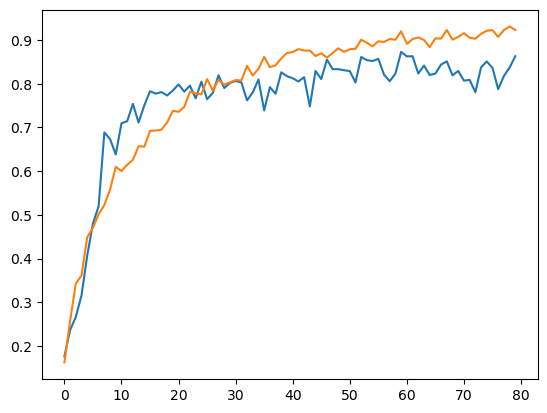

In [ ]:
vf1_arr = model1.history.history['val_f1_score']
f1_arr = model1.history.history['f1_score']
plt.plot(range(len(vf1_arr)),vf1_arr)
plt.plot(range(len(f1_arr)),f1_arr)


In [109]:
y_res = model1.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [110]:
def get_highest_threshold(testX, model):
    y_pred = model.predict(testX)
    y_res = np.argmax(y_pred, axis=1)
    max_threshold = 0
    nb_false = {}
    for threshold in np.linspace(0.001,0.999,10000):
        y_threshold = np.argmax((y_pred > threshold).astype(int), axis=1)
        comparison = [a == b for a,b in zip(y_threshold, y_res)]
        nb_false[threshold] = comparison.count(False) / y_res.shape[0]
        # if all(comparison) and max_threshold < threshold:
        #     max_threshold = threshold
    return nb_false

In [111]:
seuil_maximal = get_highest_threshold(X_test, model=model1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


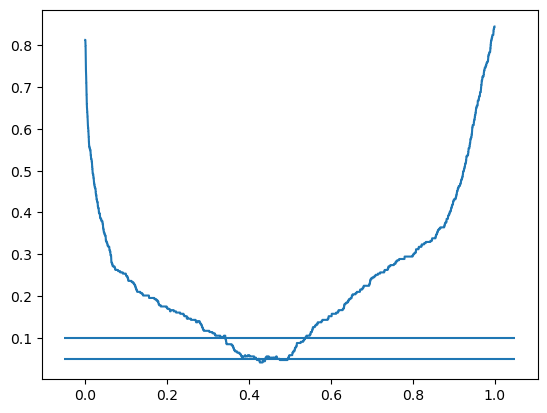

In [112]:
plt.plot(seuil_maximal.keys(), seuil_maximal.values())
plt.hlines(y=0.1, xmin=-0.05, xmax=1.05)
plt.hlines(y=0.05, xmin=-0.05, xmax=1.05)